# Bandit Problem

In [63]:
# imports
from bandits import Bandit
import random
import numpy as np
# Include your imports here, if any are used. 

A list of ten bandit objects initialized in the list...

In [2]:
bandits = [Bandit(random.random()*4-2) for _ in range(10)]

In [60]:
bandits[0].pullLever()

-1.1511117085418294

## Greedy algorithm Implementation

In [64]:
def run_greedy(iterations):
    q = np.zeros(10)
    count = np.zeros(10)
    rewards = np.zeros(iterations)

    for i in range(iterations):
        maxi = np.max(q)
        ties = np.where(q == maxi)[0]
        action = np.random.choice(ties)

        reward = bandits[action].pullLever()
        rewards[i] = reward

        count[action] += 1
        step_size = 1.0 / count[action]
        q[action] += step_size * (reward - q[action])

    return rewards

Plot the cumulative average of rewards as the number of iterations increases.

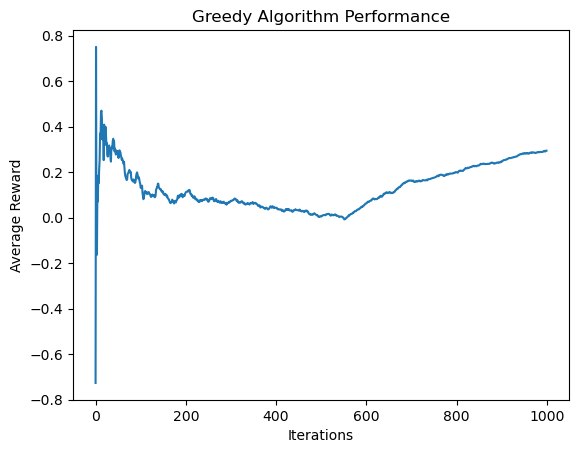

In [68]:
import matplotlib.pyplot as plt

iterations = 1000
greedy_rewards = run_greedy(iterations)

cumulative_average = np.cumsum(greedy_rewards) / (np.arange(iterations) + 1)

plt.plot(cumulative_average)
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Greedy Algorithm Performance")
plt.show()

## $\epsilon$-greedy Algorithm

In [66]:
def run_epsilon_greedy(iterations, epsilon):
    q = np.zeros(10)
    count = np.zeros(10)
    rewards = np.zeros(iterations)

    for i in range(iterations):
        if np.random.random() < epsilon:
            action = np.random.randint(10)
        else:
            maxi = np.max(q)
            ties = np.where(q == maxi)[0]
            action = np.random.choice(ties)

        reward = bandits[action].pullLever()
        rewards[i] = reward

        count[action] += 1
        step_size = 1.0 / count[action]
        q[action] += step_size * (reward - q[action])

    return rewards

Plot the cumulative average of rewards as the number of iterations increases but for various values of $\epsilon$.

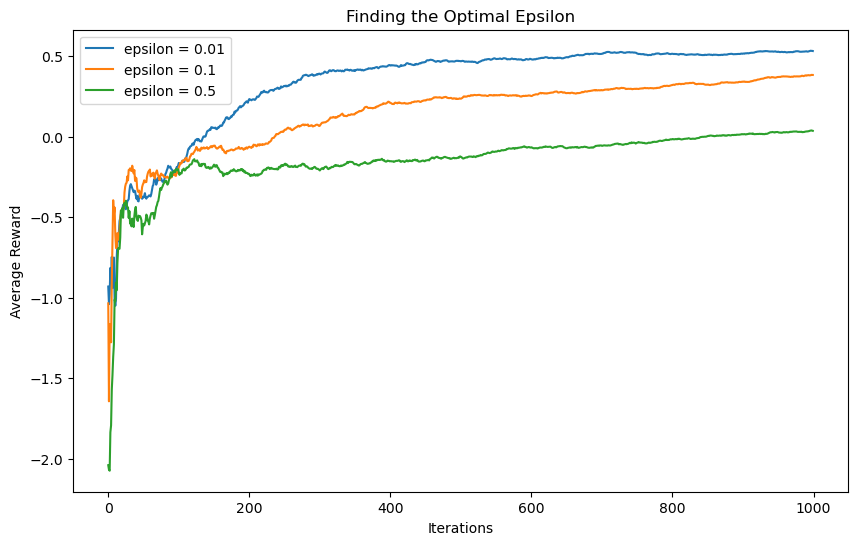

In [67]:
import matplotlib.pyplot as plt

iterations = 1000
epsilons = [0.01, 0.1, 0.5]

plt.figure(figsize=(10, 6))

for eps in epsilons:
    rewards = run_epsilon_greedy(iterations, eps)
    cumulative_average = np.cumsum(rewards) / (np.arange(iterations) + 1)
    plt.plot(cumulative_average, label=f"epsilon = {eps}")

plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Finding the Optimal Epsilon")
plt.legend()
plt.show()

## Finding the optimal $\epsilon$

Run the $\epsilon$-greedy algorithm for 1000 iterations and find the optimal $\epsilon$ value by plotting the cumulative average of rewards for various values of $\epsilon$

Optimal epsilon: 0.05263157894736842
Max average reward: 0.577668557287867


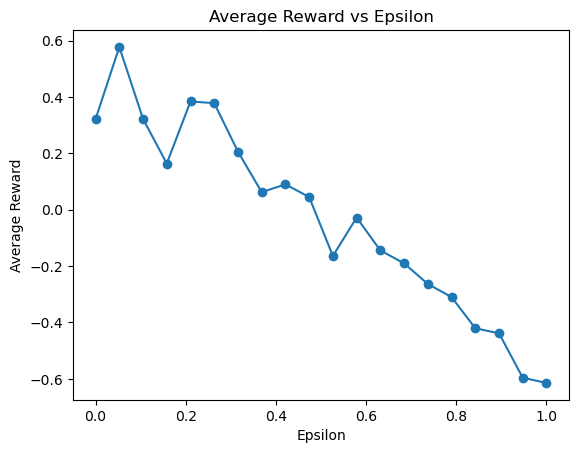

In [88]:
import numpy as np
import matplotlib.pyplot as plt

iterations = 1000
epsilons = np.linspace(0, 1, 20)
average_rewards = []

for eps in epsilons:
    rewards = run_epsilon_greedy(iterations, eps)
    average_rewards.append(np.mean(rewards))

best_idx = np.argmax(average_rewards)
best_epsilon = epsilons[best_idx]

print(f"Optimal epsilon: {best_epsilon}")
print(f"Max average reward: {average_rewards[best_idx]}")

plt.plot(epsilons, average_rewards, marker='o')
plt.xlabel("Epsilon")
plt.ylabel("Average Reward")
plt.title("Average Reward vs Epsilon")
plt.show()

## Optimistic Initial Values

In [71]:
def run_optimistic_greedy(iterations, initial_value):
    q = np.ones(10) * initial_value
    count = np.zeros(10)
    rewards = np.zeros(iterations)

    for i in range(iterations):
        maxi = np.max(q)
        ties = np.where(q == maxi)[0]
        action = np.random.choice(ties)

        reward = bandits[action].pullLever()
        rewards[i] = reward

        count[action] += 1
        step_size = 1.0 / count[action]
        q[action] += step_size * (reward - q[action])

    return rewards

Plot the cumulative average of rewards as the number of iterations increases for an optimistic greedy of $Q_1 = 10$ and a non-optimistic $\epsilon = 0.1$

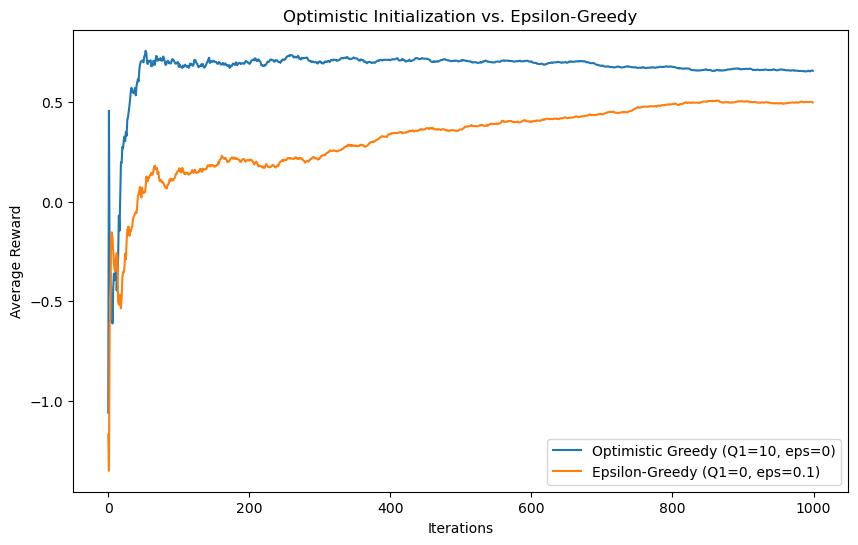

In [82]:
import matplotlib.pyplot as plt

iterations = 1000
optimistic_rewards = run_optimistic_greedy(iterations, 10.0)
avg_optimistic = np.cumsum(optimistic_rewards) / (np.arange(iterations) + 1)

epsilon_rewards = run_epsilon_greedy(iterations, 0.1)
avg_epsilon = np.cumsum(epsilon_rewards) / (np.arange(iterations) + 1)

# 3. Plot Comparison
plt.figure(figsize=(10, 6))
plt.plot(avg_optimistic, label="Optimistic Greedy (Q1=10, eps=0)")
plt.plot(avg_epsilon, label="Epsilon-Greedy (Q1=0, eps=0.1)")

plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Optimistic Initialization vs. Epsilon-Greedy")
plt.legend()
plt.show()

## Optional - Upper Confidence Bound (UCB)

In [7]:
def run_ucb(c):
    # TODO: Implement the UCB algorithm here
    # Return the reward from the bandits in a list
    pass